In [53]:
!pip install sk-video

In [0]:
import skvideo.io  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
import random
from numba import prange
import plotly.express as px
from sklearn.cluster import KMeans

In [55]:
video = skvideo.io.vread("/content/videoplayback.mp4")  
print(video.shape)

(1682, 360, 640, 3)


In [56]:
#Create Background Tensor
background = video[0].copy()
background.shape

(360, 640, 3)

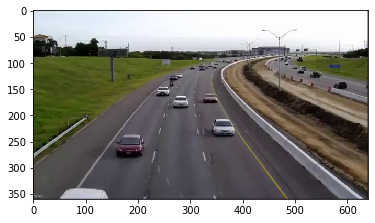

In [57]:
plt.imshow(background)
plt.show()

In [73]:
#Get random frames to speed up process
n_frames = 10
frames_idx = []
for i in range(0, n_frames):
  frames_idx.append(random.randint(0, video.shape[0]))
  print(random.randint(0, video.shape[0]))

863
986
506
1405
1322
691
1443
42
317
996


In [59]:
%%time
for x in prange(0,640):
  for y in prange(300, 360):
    colors=[]
    for z in frames_idx:
      colors.append(video[z][y][x])
    km = KMeans(n_clusters = 2)
    km = km.fit(colors)
    most_common = max(clusters, key=clusters.get)
    background_pixel = [int(i) for i in list(km.cluster_centers_[most_common])]
    background[y][x] = background_pixel

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ConvergenceWarning:

Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ConvergenceWarning:

Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ConvergenceWarning:

Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ConvergenceWarning:

Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ConvergenceWarning:

Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.

/usr/local/lib/python3.6/dist-packages/i

CPU times: user 9min 13s, sys: 3.94 s, total: 9min 17s
Wall time: 9min 13s


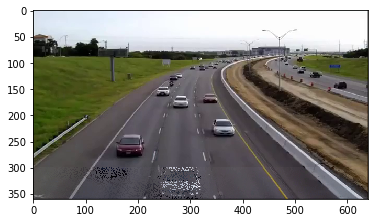

In [60]:
plt.imshow(background)
plt.show()

In [0]:
labels, counts = np.unique(km.labels_, return_counts=True)
clusters = dict(zip(labels, counts))

In [62]:
clusters

{0: 2, 1: 1}

In [63]:
max(clusters, key=clusters.get)

0

In [64]:
most_common = max(clusters, key=clusters.get)
[int(i) for i in list(km.cluster_centers_[most_common])]

[30, 26, 27]

In [0]:
pixel = pd.DataFrame(colors, columns=["R","G","B"])

In [0]:
#test
km = KMeans(n_clusters = 2)
km = km.fit(colors)

In [0]:
km = KMeans(n_clusters = 2)
km = km.fit(pixel)

In [0]:
pixel["label"] = km.labels_

In [69]:
pixel

,R,G,B,label
0,30,24,29,0
1,35,27,35,1
2,30,28,26,0


In [70]:
fig = px.scatter_3d(pixel, x = "R", y = "G", z = "B", color="label")
fig.show()

In [71]:
len(pixel[pixel["label"]==0])

2

In [72]:
len(pixel[pixel["label"]==1])

1